# Exercise 1: K-Means with Sklearn
---

In [29]:
from sklearn.datasets import load_iris
import pandas as pd

In [30]:
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)

In [31]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [38]:
X = df.values
cl = df.target.values

#### K-Means, with random seed, 3 clusters

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score

for i in range(5):

    kmeans = KMeans(n_clusters=3, random_state=i, init='k-means++').fit(X)
    cl_pred = kmeans.labels_

    score = rand_score(cl, cl_pred)
    print(f' Clustering {i} -> Rand Index score = {round(score, 4)}')

 Clustering 0 -> Rand Index score = 0.9911
 Clustering 1 -> Rand Index score = 0.9911
 Clustering 2 -> Rand Index score = 0.9911
 Clustering 3 -> Rand Index score = 0.9911
 Clustering 4 -> Rand Index score = 0.9911


#### K-Means, NO random seed, n clusters

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score

best_score_sup = -1
best_score_unsup = -1
best_k_sup = -1
best_k_unsup = -1

for i in range(2, 21):

    kmeans = KMeans(n_clusters=i, random_state=None, init='random', n_init=1).fit(X)
    cl_pred = kmeans.labels_

    score_sup = rand_score(cl, cl_pred)
    score_unsup = silhouette_score(X, cl_pred, metric='euclidean')

    if score_sup > best_score_sup:
        best_score_sup = score_sup
        best_k_sup = i

    if score_unsup > best_score_unsup:
        best_score_unsup = score_unsup
        best_k_unsup = i

    print(
        f' Clustering {i} -> SUPERVISED score = {round(score_sup, 4)}, UNSUPERVISED  score = {round(score_unsup, 4)}')

print(f'\nBest scores: ')
print(f'SUPERVISED: score = {round(best_score_sup, 4)} -> k = {best_k_sup}')
print(f'UNSUPERVISED: score = {round(best_score_unsup, 4)} -> k = {best_k_unsup}')

 Clustering 2 -> SUPERVISED score = 0.7719, UNSUPERVISED  score = 0.6801
 Clustering 3 -> SUPERVISED score = 0.9911, UNSUPERVISED  score = 0.5819
 Clustering 4 -> SUPERVISED score = 0.9514, UNSUPERVISED  score = 0.5514
 Clustering 5 -> SUPERVISED score = 0.8845, UNSUPERVISED  score = 0.506
 Clustering 6 -> SUPERVISED score = 0.8725, UNSUPERVISED  score = 0.5148
 Clustering 7 -> SUPERVISED score = 0.8615, UNSUPERVISED  score = 0.4915
 Clustering 8 -> SUPERVISED score = 0.8036, UNSUPERVISED  score = 0.3722
 Clustering 9 -> SUPERVISED score = 0.7919, UNSUPERVISED  score = 0.3359
 Clustering 10 -> SUPERVISED score = 0.7768, UNSUPERVISED  score = 0.3337
 Clustering 11 -> SUPERVISED score = 0.7717, UNSUPERVISED  score = 0.3339
 Clustering 12 -> SUPERVISED score = 0.7689, UNSUPERVISED  score = 0.3034
 Clustering 13 -> SUPERVISED score = 0.7621, UNSUPERVISED  score = 0.2977
 Clustering 14 -> SUPERVISED score = 0.7541, UNSUPERVISED  score = 0.2876
 Clustering 15 -> SUPERVISED score = 0.7437, UN

K Means with PCA

In [66]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
import numpy as np

In [72]:
reduced_data = PCA(n_components=2).fit_transform(X) 
kmeans_model = KMeans(n_clusters=3, random_state=None, init='random', n_init=1)
kmeans_model.fit(reduced_data)

KMeans(init='random', n_clusters=3, n_init=1)

In [73]:
# Step size of the mesh. Decrease to increase the quality of the VQ. 
h = 0.02 # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_model.predict(np.c_[xx.ravel(), yy.ravel()])

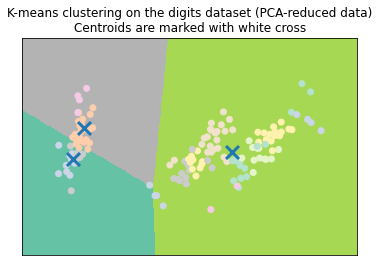

In [76]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap='Set2',
    aspect="auto",
    origin="lower",
)

# Plot the centroids as a white X
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
            c=cl_pred, cmap='Pastel2')
centroids = kmeans_model.cluster_centers_

plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
